# TidyTuesday 20210706 - Independence Day 

![image](https://www.morriscountynj.gov/files/sharedassets/public/main-site/newsarchive-media/2018/fireworks-designecologist-2.jpg?dimension=pageimagefullwidth&w=1140)

## Introduction

This week in [Tidy Tuesday](https://github.com/rfordatascience/tidytuesday/tree/master/data/2021/2021-07-06) the data comes from [Wikipedia](https://en.wikipedia.org/wiki/List_of_national_independence_days). The dataset lists each countries independence day, and where they gained independence from.

> An independence day is an annual event commemorating the anniversary of a nation's independence or statehood, usually after ceasing to be a group or part of another nation or state, or more rarely after the end of a military occupation. Many countries commemorate their independence from a colonial empire. American political commentator Walter Russell Mead notes that, "World-wide, British Leaving Day is never out of season.

## Load Libraries and Data

In [1]:
# libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import re
from math import floor

In [2]:
# data
holidays = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-07-06/holidays.csv')
print("Shape of dataframe (rows, columns): ", holidays.shape)
holidays.head()

Shape of dataframe (rows, columns):  (216, 12)


,country,date_parsed,weekday,day,month,name_of_holiday,date_of_holiday,year_of_event,independence_from,event_commemorated_and_notes,year,date_mdy
0,Afghanistan,1919-08-19,Tuesday,19.0,Aug,Afghan Independence Day (Afghan Victory Day),August 19,1919.0,United Kingdom,Anglo-Afghan Treaty of 1919 or Treaty of Rawal...,1919.0,"August 19, 1919"
1,Albania,1912-11-28,Thursday,28.0,Nov,Flag Day (Dita e Flamurit),November 28,1912.0,Ottoman Empire,Albanian Declaration of Independence. The foll...,1912.0,"November 28, 1912"
2,Algeria,1962-07-05,Thursday,5.0,Jul,Independence Day,July 5,1962.0,France,Algeria gained independence following the Alge...,1962.0,"July 5, 1962"
3,Andorra,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,1975-11-11,Tuesday,11.0,Nov,Independence Day,November 11,1975.0,Portugal,"The Alvor Agreement, signed on 15 January 1975...",1975.0,"November 11, 1975"


## Exploratory Data Analysis

In [3]:
holidays.groupby('independence_from').size()\
    .reset_index(name = 'count').sort_values(by = 'count', ascending = False)\
    .head()

,independence_from,count
42,United Kingdom,51
13,France,26
38,Spanish Empire,17
34,Soviet Union,11
26,Portugal,7


## Tidy Dataset

In [4]:
# clean 'independence_from' column

## remove bracketed numbers
holidays['independence_from'] = holidays['independence_from'].replace(r'\[[0-9]{2}\]', '')

## remove nan with 'None'
holidays['independence_from'] = holidays['independence_from'].replace(np.nan, 'None')

## consolidate instances of United Kingdom
holidays['independence_from'] = holidays['independence_from'].replace('United Kingdom of Great Britain and Ireland', 'United Kingdom')
holidays['independence_from'] = holidays['independence_from'].replace('Kingdom of Great Britain', 'United Kingdom')
holidays['independence_from'] = holidays['independence_from'].replace('United Kingdom and the British Mandate for Palestine', 'United Kingdom')
holidays['independence_from'] = holidays['independence_from'].replace('Australia, New Zealand and the United Kingdom', 'United Kingdom')
holidays['independence_from'] = holidays['independence_from'].replace('Allied occupying powers (France, United Kingdom, United States and Soviet Union)', 'United Kingdom')
holidays['independence_from'] = holidays['independence_from'].replace('Italy and United Kingdom', 'United Kingdom')
holidays['independence_from'] = holidays['independence_from'].replace('Egypt and the United Kingdom', 'United Kingdom')

## consolidate instances of Russia
### note Soviet Union != Russia
holidays['independence_from'] = holidays['independence_from'].replace('Russian Soviet Federative Socialist Republic', 'Russia')
holidays['independence_from'] = holidays['independence_from'].replace('Russian Soviet Federative Socialist Republic and German Empire', 'Russia')

## consolidate instances of Soviet Union

## consolidate instances of Spain
holidays['independence_from'] = holidays['independence_from'].replace('Spanish Empire', 'Spain')

## consolidate instances of Yugoslavia
holidays['independence_from'] = holidays['independence_from'].replace('Socialist Federal Republic of Yugoslavia', 'Yugoslavia')
holidays['independence_from'] = holidays['independence_from'].replace('SFR Yugoslavia', 'Yugoslavia')

# generate top five independence from list
head_independence_from = holidays[holidays['independence_from'] != 'None']\
    .groupby('independence_from').size().reset_index(name = 'count')\
    .sort_values(by = 'count', ascending = False).head()
head_independence_from_list = head_independence_from['independence_from'].tolist()

print("Top 5 countries from which independence was claimed\n")
head_independence_from

Top 5 countries from which independence was claimed



,independence_from,count
33,United Kingdom,58
10,France,26
29,Spain,21
26,Soviet Union,11
23,Russia,9


## Present Data

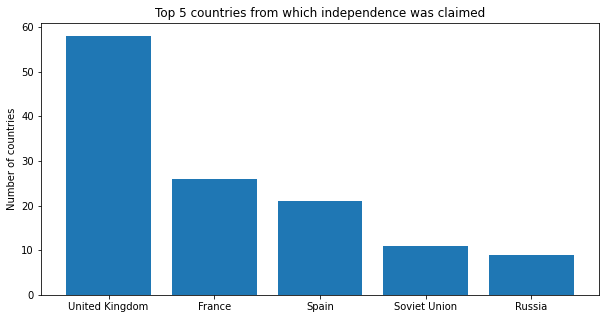

In [5]:
# top contributes from which independence was claimed
plt.figure(figsize = (10,5))
plt.bar(head_independence_from['independence_from'], head_independence_from['count'])
plt.title('Top 5 countries from which independence was claimed')
plt.ylabel('Number of countries');

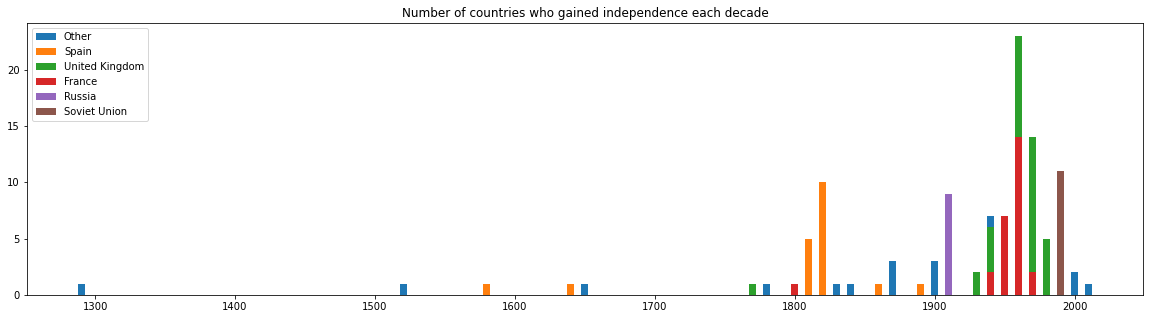

In [6]:
holidays['former_sovereign'] = np.where(holidays['independence_from'].
                                        isin(head_independence_from_list),
                                        holidays['independence_from'],
                                        'Other')
holidays['year'] = holidays['year'].replace(np.nan, 0)
#holidays['decade'] = (floor(holidays['year'] / 10) * 10)
holidays['decade'] = (np.floor(holidays['year'] / 10) * 10) #.astype(int).astype(str)
indie_years = holidays[holidays['decade'] != 0].groupby(['former_sovereign', 'decade']).size().\
    reset_index(name = 'count').sort_values(by = 'decade') #.set_index('year')

plt.figure(figsize = (20,5))
for country in indie_years['former_sovereign'].unique().tolist():
    slice = indie_years[indie_years['former_sovereign'] == country].sort_values(by = 'decade')
    plt.bar(slice['decade'], 
            slice['count'],
            label = country, 
            width = 5)
plt.legend()
plt.title('Number of countries who gained independence each decade');

I want to replace the legend in the top right with a subplot of the 'Top 5 Countries' bar chart.